In [5]:
import pandas as pd
import numpy as np

# Data with intentional 'unclean' elements for a data cleaning exercise
data = {
    "City": ["Redwood City", "San Mateo", "Daly City", "South San Francisco", "San Bruno",
             "Pacifica", "Burlingame", "Foster City", "Menlo Park", "Millbrae"],
    "Total Population": [85000, 105000, 107000, None, 43000, 40000, 30000, 34000, 36000, 23000],
    "Median Age": [35.5, 37.2, 34.1, 33.0, 36.7, 38.9, None, 40.3, 39.7, 37.5],
    "Percent White": [60, None, 40, 45, 50, 55, 70, 65, 75, "eighty"],
    "Percent Black": [5, 3, 6, 7, "two", 4, 2, 1, 3, 2],
    "Percent Hispanic": [25, 30, 35, None, 20, 18, 15, 12, 10, 9],
    "Percent Asian": [10, 12, 19, 20, 15, 12, 13, 22, 12, 9],
    "Median Household Income": ["$90,000", "$110,000", "$80,000", "$100,000", "$85,000",
                                "$95,000", "$120,000", "$130,000", "$140,000", "$105,000"],
    "Median Home Value": [1100000, 1400000, 950000, 1000000, 850000, 800000, 1500000, 1600000, 1700000, 1100000],
    "Average Rent": [2500, 2800, 2200, 2300, 2400, 2100, 2700, 2900, 3100, 2500],
    "Homeownership Rate": [55, 60, 50, 55, 52, 58, 65, 62, 60, 59],
    "Unemployment Rate": [3.5, 3.2, 4.1, 3.8, 3.6, 3.4, 2.8, 2.9, 2.7, 3.1]
}

# Create DataFrame
df_unclean = pd.DataFrame(data)

# Save to CSV
df_unclean.to_csv('San_Mateo_County_Cities_Demographics_Unclean.csv', index=False)


In [7]:
df = pd.read_csv('San_Mateo_County_Cities_Demographics_Unclean.csv')
df.head()

,City,Total Population,Median Age,Percent White,Percent Black,Percent Hispanic,Percent Asian,Median Household Income,Median Home Value,Average Rent,Homeownership Rate,Unemployment Rate
0,Redwood City,85000.0,35.5,60,5,25.0,10,"$90,000",1100000,2500,55,3.5
1,San Mateo,105000.0,37.2,NaN,3,30.0,12,"$110,000",1400000,2800,60,3.2
2,Daly City,107000.0,34.1,40,6,35.0,19,"$80,000",950000,2200,50,4.1
3,South San Francisco,NaN,33.0,45,7,NaN,20,"$100,000",1000000,2300,55,3.8
4,San Bruno,43000.0,36.7,50,two,20.0,15,"$85,000",850000,2400,52,3.6


In [8]:
#check for data types and missing info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     10 non-null     object 
 1   Total Population         9 non-null      float64
 2   Median Age               9 non-null      float64
 3   Percent White            9 non-null      object 
 4   Percent Black            10 non-null     object 
 5   Percent Hispanic         9 non-null      float64
 6   Percent Asian            10 non-null     int64  
 7   Median Household Income  10 non-null     object 
 8   Median Home Value        10 non-null     int64  
 9   Average Rent             10 non-null     int64  
 10  Homeownership Rate       10 non-null     int64  
 11  Unemployment Rate        10 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 1.1+ KB
None


## Data Cleaning

In [9]:
#fill missing values with mean(numerical) and mode(categorical)
#i didn't drop data because the dataset is too small
df['Total Population'] = df['Total Population'].fillna(df['Total Population'].mean())
df['Median Age'] = df['Median Age'].fillna(df['Median Age'].mean())
df['Percent White'] = df['Percent White'].fillna(df['Percent White'].mode()[0])
df['Percent Hispanic'] = df['Percent Hispanic'].fillna(df['Percent Hispanic'].mode()[0])

In [10]:
#correct data types
#remove commas and dollar signs; convert to float
df['Median Household Income'] = df['Median Household Income'].replace('[\$,]', '', regex=True).astype(float)

#convert 'percent white' where it's non-numeric values
df['Percent White'] = pd.to_numeric(df['Percent White'], errors='coerce')

In [11]:
#standardize text entries to title case
df['City'] = df['City'].str.title()

In [12]:
#dealing with non-numeric entries
df['Percent Black'] = pd.to_numeric(df['Percent Black'], errors='coerce')

In [13]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     10 non-null     object 
 1   Total Population         10 non-null     float64
 2   Median Age               10 non-null     float64
 3   Percent White            9 non-null      float64
 4   Percent Black            9 non-null      float64
 5   Percent Hispanic         10 non-null     float64
 6   Percent Asian            10 non-null     int64  
 7   Median Household Income  10 non-null     float64
 8   Median Home Value        10 non-null     int64  
 9   Average Rent             10 non-null     int64  
 10  Homeownership Rate       10 non-null     int64  
 11  Unemployment Rate        10 non-null     float64
dtypes: float64(7), int64(4), object(1)
memory usage: 1.1+ KB
None
                  City  Total Population  Median Age  Percent White  \
0   

## EDA: Exploratory Data Analysis

In [14]:
#descriptive statistics
print(df.describe())

       Total Population  Median Age  Percent White  Percent Black  \
count         10.000000   10.000000       9.000000       9.000000   
mean       55888.888889   36.988889      55.555556       3.666667   
std        31476.426609    2.329256      12.856041       2.000000   
min        23000.000000   33.000000      40.000000       1.000000   
25%        34500.000000   35.800000      45.000000       2.000000   
50%        41500.000000   37.094444      55.000000       3.000000   
75%        77722.222222   38.550000      65.000000       5.000000   
max       107000.000000   40.300000      75.000000       7.000000   

       Percent Hispanic  Percent Asian  Median Household Income  \
count         10.000000      10.000000                10.000000   
mean          18.300000      14.400000            105500.000000   
std            9.165758       4.452215             19642.640691   
min            9.000000       9.000000             80000.000000   
25%           10.500000      12.000000     

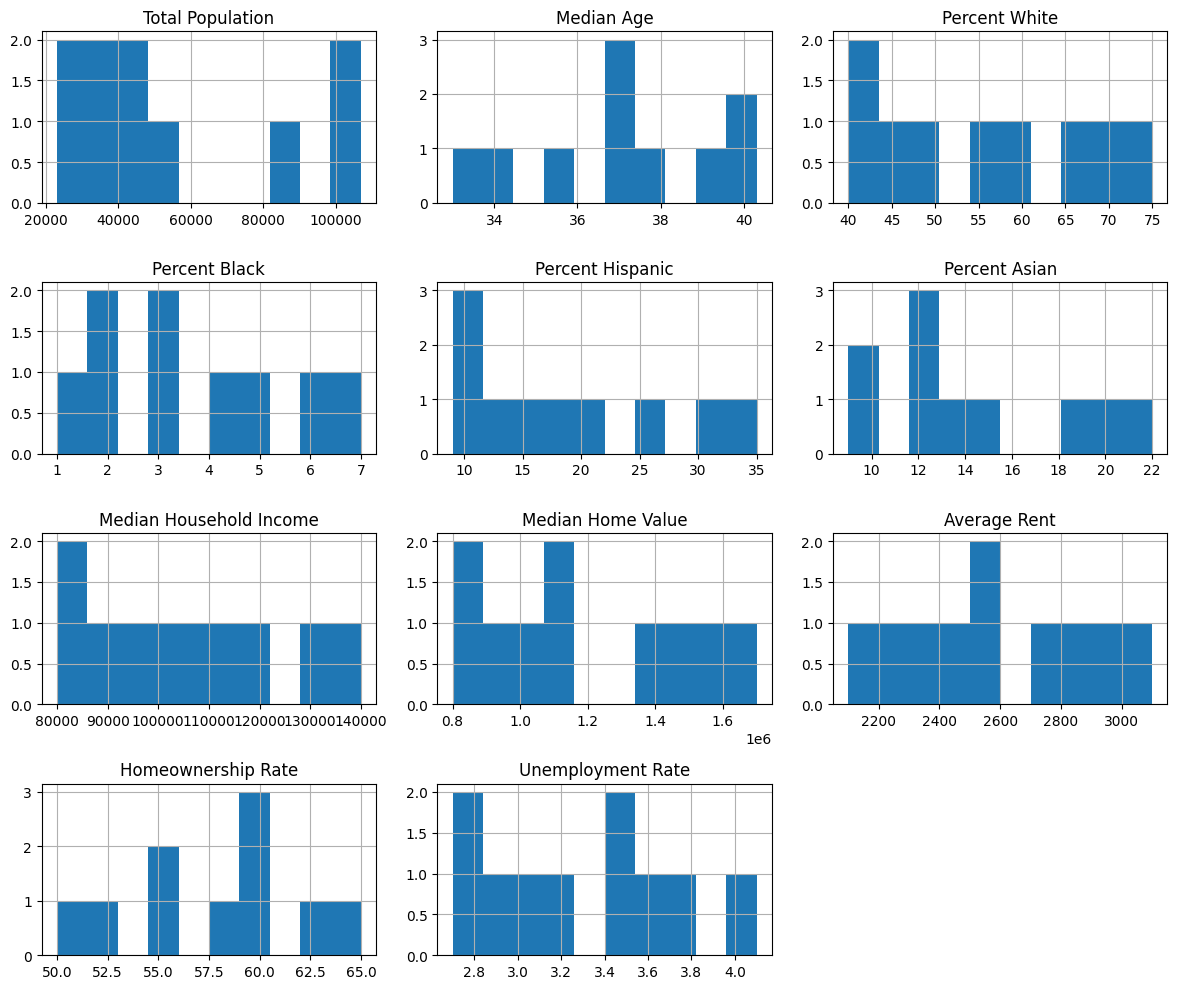

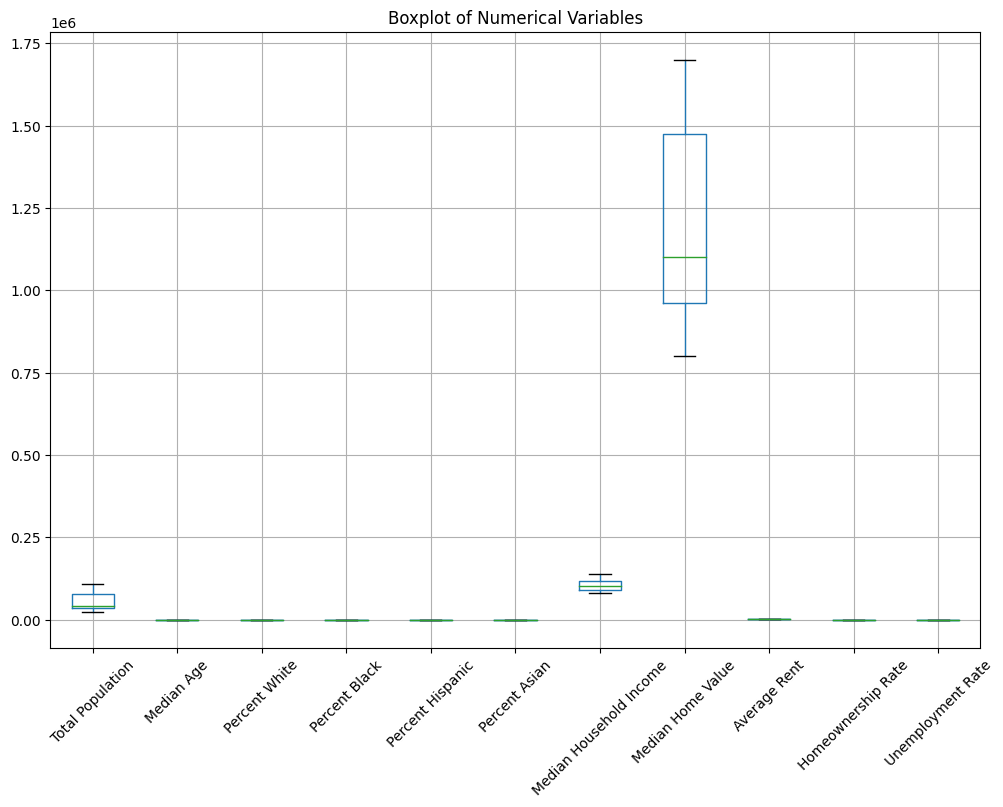

In [16]:
#distribution: help me see range, central tendencies, skew
import matplotlib.pyplot as plt
import seaborn as sns

#histogram for numerical data
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

#boxplot to find any outliers
plt.figure(figsize=(12,8))
df.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Variables')
plt.show()

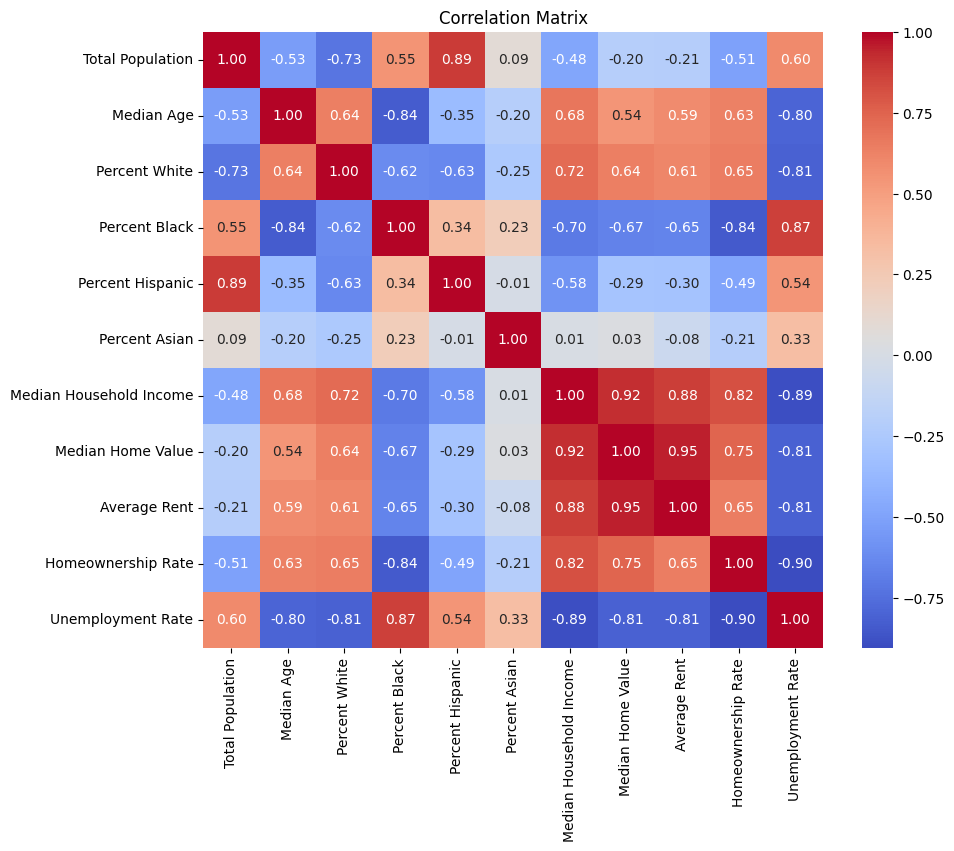

In [22]:
#correlation analysis
# corr_matrix = df.corr() -- this didn't work bc it can't read city names

#select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

#calculate correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

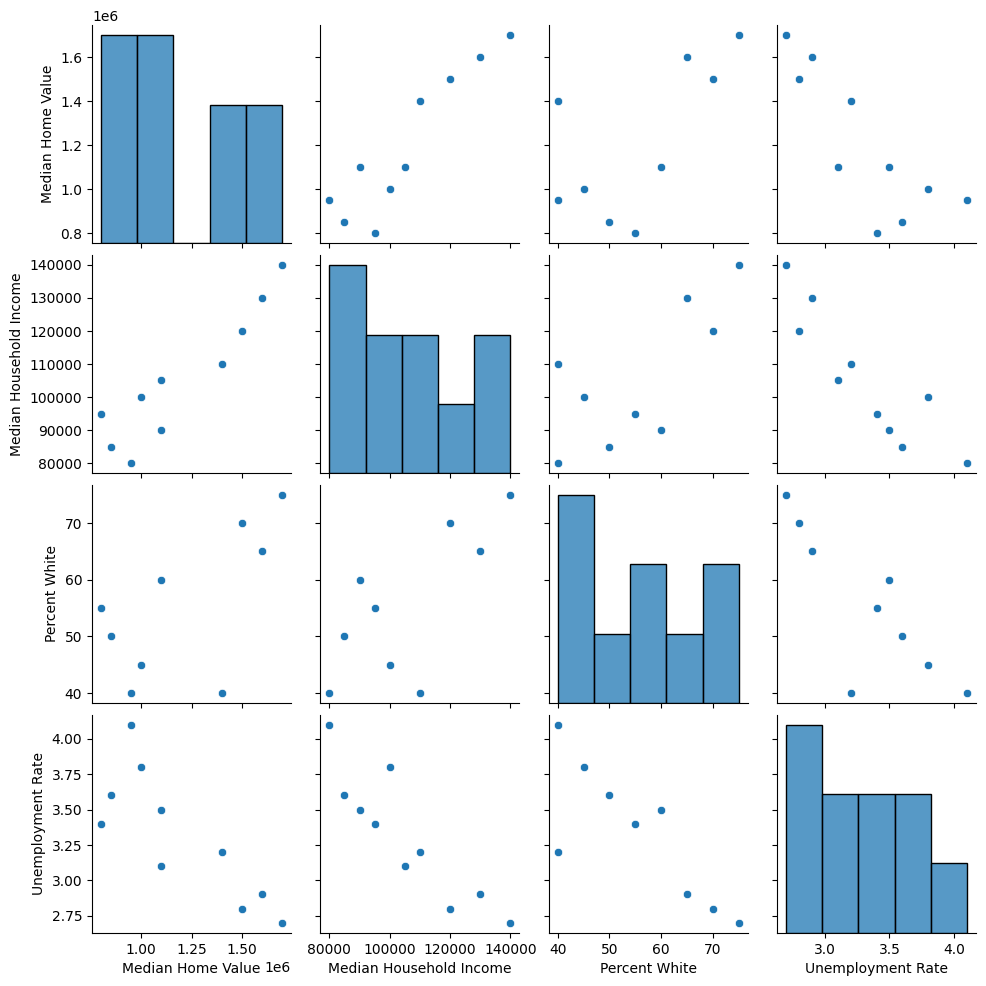

In [23]:
#pair plots
sns.pairplot(df[['Median Home Value', 'Median Household Income', 'Percent White', 'Unemployment Rate']])
plt.show()

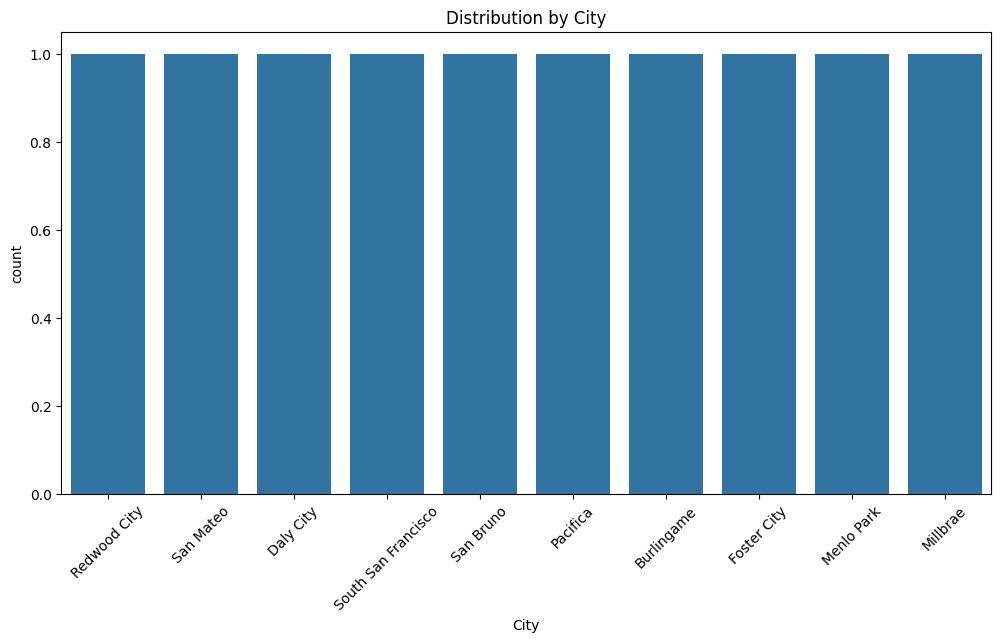

In [24]:
#bar plots for categorical data
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='City')
plt.title('Distribution by City')
plt.xticks(rotation=45)
plt.show()

In [27]:
from google.colab import drive
drive.mount('/content/drive')

# Specify the path within Google Drive
path = '/content/drive/My Drive/Colab Notebooks/San_Mateo_County_Cities_Demographics.csv'

# Save DataFrame to Google Drive
df.to_csv(path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
